# Data Visualisation Report

## Analysing The Data

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("melb_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

From the information above, it can be seen that:

- There are missing values in Car, BuildingArea, YearBuilt and CouncilArea
- Date is not set in a DateTime format
- 8 Columns are categorical and would need to be encoded into numeric values so it can be used with machine learning models.

### Attribute Details

 - Suburb: Residential District

 - Address: House name/number and Street name

 - Rooms: Number of rooms

 - Price: Price in dollars

 - Method: Sale Type

 - Type: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse

 - SellerG: Real Estate Agent

 - Date: Date sold

 - Distance: Distance from CBD (Central district of Melbourne)

 - Regionname: General Region (West, North West, North, North east …etc)

 - Propertycount: Number of properties that exist in the suburb.

 - Bedroom2 : No. of Bedrooms

 - Bathroom: Number of Bathrooms

 - Car: Number of carspots

 - Landsize: Land Size

 - BuildingArea: Building Size

 - CouncilArea: Governing council for the area

Attributes such as Method, SellerG and building area are redundant for use in machine learning as they either don't provide data that a house would have prior to a sale such as Method, or have little correlation to house price such as the SellerG and building area. These attributes will be dropped from the data.

In [3]:
drop_list = ["Method", "SellerG", "BuildingArea"]
data = data.drop(drop_list, axis=1)

Next, the missing values would either need to have the entire rows dropped or filled with the median of that attribute. The council area is a significant factor in making predictions and has a similar size to the Car attribute. The data will be resized to the length of the council area so there are no major missing values.

In [4]:
print("Prior number of data-points:", len(data))
data = data.dropna(axis=0, how='any', subset=["CouncilArea"])
print("Data-points after drop:", len(data))

Prior number of data-points: 13580
Data-points after drop: 12211


In [5]:
data["Date"] = pd.to_datetime(data["Date"])

### Categorical Data

In [6]:
print("Suburb Categories:\n", data["Suburb"].value_counts(), "\n")

Suburb Categories:
 Reservoir         323
Richmond          251
Bentleigh East    234
Preston           229
Essendon          208
                 ... 
Croydon South       1
Kilsyth             1
Rockbank            1
Keilor Lodge        1
Officer             1
Name: Suburb, Length: 308, dtype: int64 



In [7]:
print("Dwelling Type:\n", data["Type"].value_counts(), "\n")

Dwelling Type:
 h    8204
u    2962
t    1045
Name: Type, dtype: int64 



In [8]:
print("Regionname Categories:\n", data["Regionname"].value_counts(), "\n")
print("CouncilArea Categories:\n", data["CouncilArea"].value_counts(), "\n")

Regionname Categories:
 Southern Metropolitan         4340
Northern Metropolitan         3554
Western Metropolitan          2668
Eastern Metropolitan          1229
South-Eastern Metropolitan     325
Eastern Victoria                44
Northern Victoria               26
Western Victoria                25
Name: Regionname, dtype: int64 

CouncilArea Categories:
 Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston     

These features might have a potential use but would need to be presented in a numerical form if they are to be passed into any machine learning model

## Position Mapping

### Density Map

In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Housing Density Map')

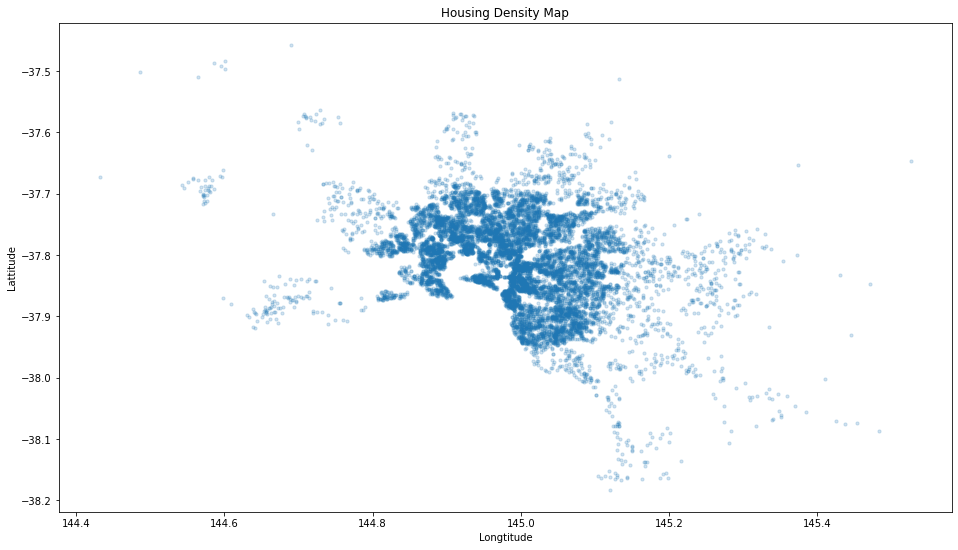

In [10]:
data.plot(x = "Longtitude", y = "Lattitude", kind = "scatter", alpha = 0.2, s = 10, figsize = (16, 9))
plt.title("Housing Density Map")

The density map above shows each datapoint for a house. The darker areas indicate a denser amount of houses which could be treated as a hotspot or cluster.

### Price Heatmap

In [11]:
import seaborn as sns

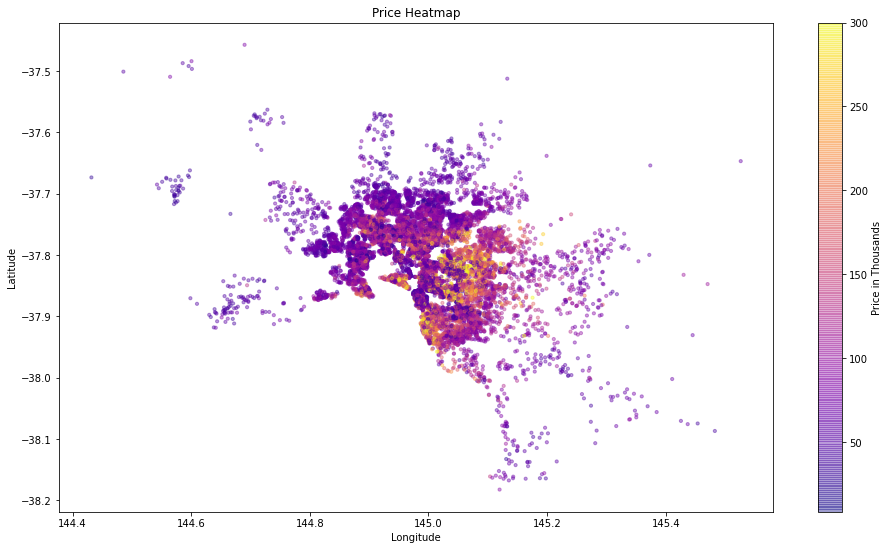

In [12]:

#color scheme for the heatmap
cm = plt.cm.get_cmap('plasma')

#plotting data
fig = plt.figure(figsize=(16, 9))
plt.scatter(x = data['Longtitude'], y= data['Lattitude'], alpha= 0.4, c = data['Price']/10000, s = 10, cmap=cm)

#labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price Heatmap')

#legend
cbar = plt.colorbar()
cbar.set_label('Price in Thousands')
plt.clim(vmax= 300)

plt.show()

**Image above shows Melbourne House Prices : Yellow indicates expensive, blue is cheaper**

Taking the density map further, the image above shows the price of each datapoint alongside its density. It can clearly be seen that there are a few hotspots with higher price points closer to the centre of Melbourne.


## Attribute Correlation

<AxesSubplot:>

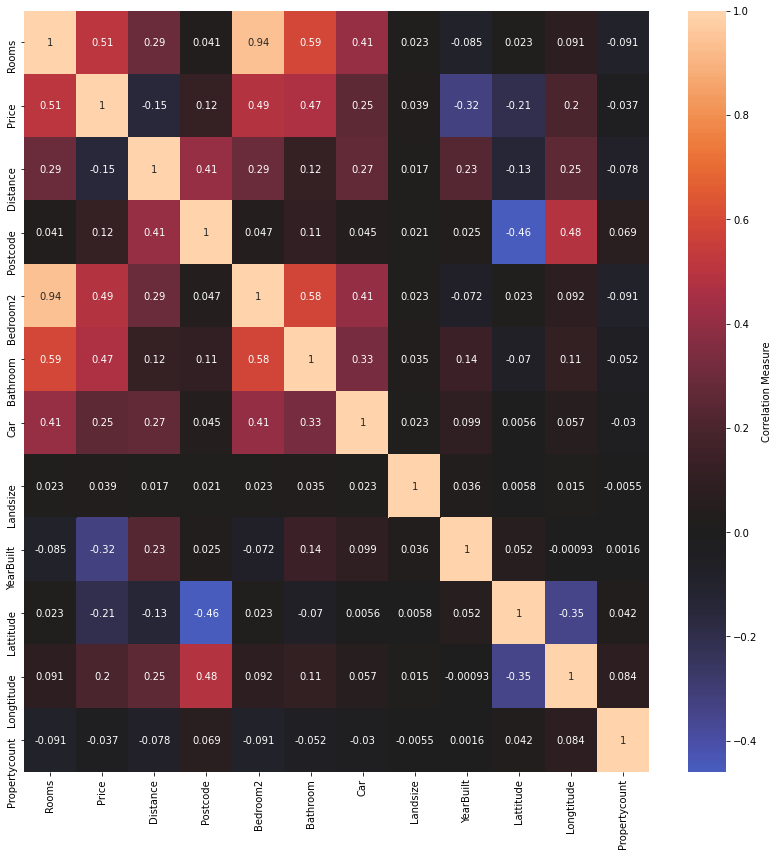

In [13]:
corrmat = data.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corrmat, annot=True, center=0, cbar_kws={'label' : 'Correlation Measure'})

From the correlation matrix, a few similarities can be determined in it's raw form. There are correlations between:

- No. of rooms to Price (Moderate Positive Correlation)
- No. of rooms to No. of bedrooms (Strong Positive Correlation)
- No. of rooms to No. of Bathrooms (Moderate Positive Correlation)

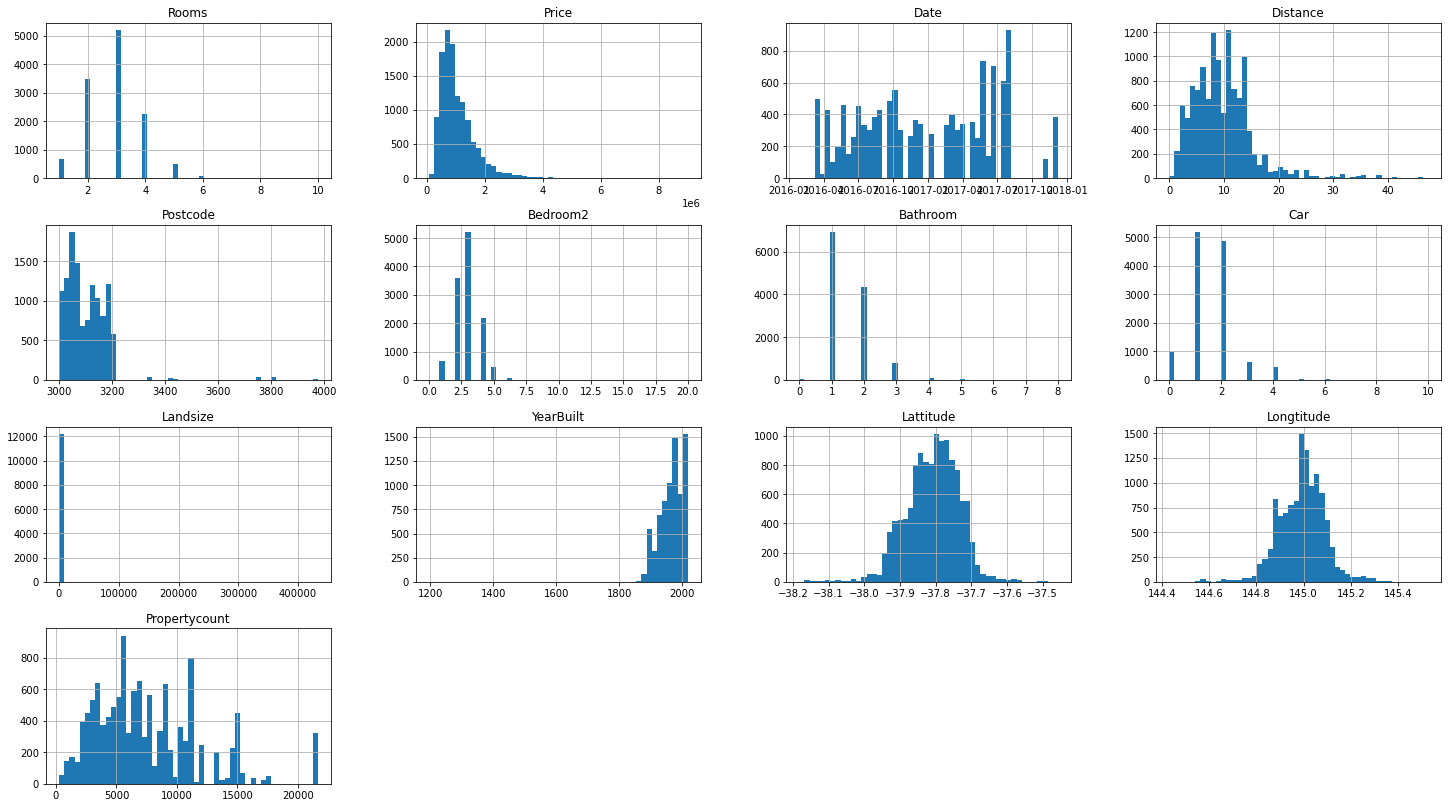

In [14]:
data.hist(bins=50, figsize=(25,14))
plt.show()

Some things to mention about these histograms are that the BuildingArea, YearBuilt, Landsize and Bedroom2 attributes are noticeably stretched in their range, suggesting the possibility of outliers which make not have been found yet.

In [15]:
housing_data = data # Create copy of raw data
housing_data["bedrooms_per_room"] = housing_data["Bedroom2"]/housing_data["Rooms"]
housing_data["bathrooms_per_room"] = housing_data["Bathroom"]/housing_data["Rooms"]
housing_data["rooms_per_car_space"] = housing_data["Rooms"]/housing_data["Car"]

In [16]:
corr_matrix = housing_data.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price                  1.000000
Rooms                  0.510522
Bedroom2               0.487402
Bathroom               0.473933
Car                    0.248628
Longtitude             0.201424
Postcode               0.118202
rooms_per_car_space    0.093644
Landsize               0.038536
bathrooms_per_room    -0.004749
bedrooms_per_room     -0.036464
Propertycount         -0.037167
Distance              -0.146137
Lattitude             -0.207404
YearBuilt             -0.321249
Name: Price, dtype: float64

The above shows the Correlation Coefficient for each attribute against the price. The Created features show no benefit towards a correlation but there are still some attributes which show a usable trend in the data. For example, the price appears to be influenced by the No. of rooms, bedrooms, bathrooms. The postcode does appear to have some effect on the price but attributes such as the YearBuilt does show a negative trend towards the price, suggesting that newer builds cost more than older buildings.

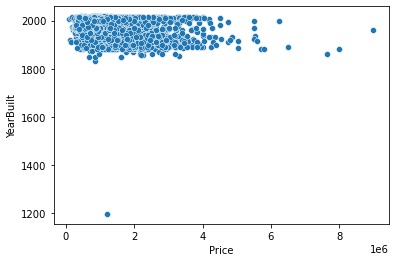

In [17]:
sns.scatterplot(data=housing_data, x="Price", y= "YearBuilt")
plt.show()

As mentioned in a prior histogram, here there is an outlier which could have potentially skewed the correlation coefficient which needs to be removed before any further visualisation or statistics are applied.

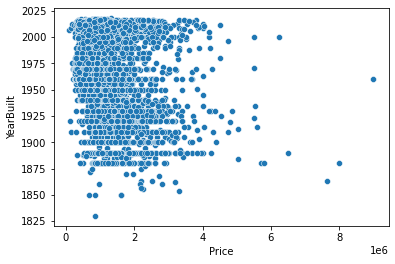

In [18]:
#limiting the dataset to houses above the year 1600
df = data[data["YearBuilt"] > 1600]

#plotting the df to see if the limit has been applied
sns.scatterplot(data=df, x="Price", y= "YearBuilt")
plt.show()

The price does appear to have some negative correlation but only slight.

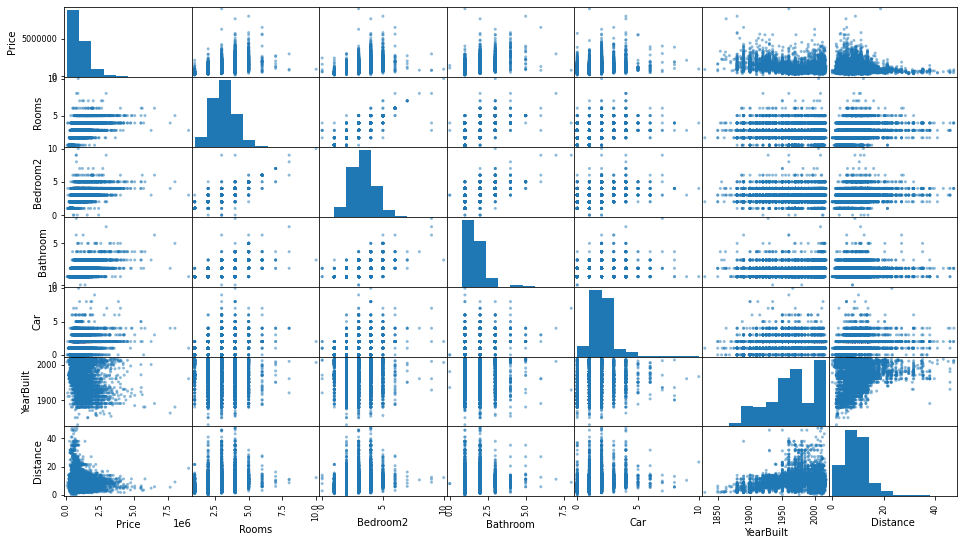

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["Price", "Rooms", "Bedroom2", "Bathroom", "Car","YearBuilt", "Distance"]
scatter_matrix(df[attributes], figsize=(16, 9))
plt.show()

The scatter matrix does confirm the the correlations between particular attributes such as the YearBuilt - Price, Price - Distance, Distance - YearBuilt and Price - Rooms to some extent.
Some other interesting trends are that the Distance from CBD (Central district of Melbourne) of housing has increased over the years, suggesting houses are being built more outward from the Centre which correlates with High-Density areas such as this. There are also more correlations between the price and features; Bedroom2, Bathroom and Rooms. This does appear to be linear and could be used for a linear regression model. There is a concern though that the data for those features are incremented and blocky which might make it difficult to draw an accurate trend on them.

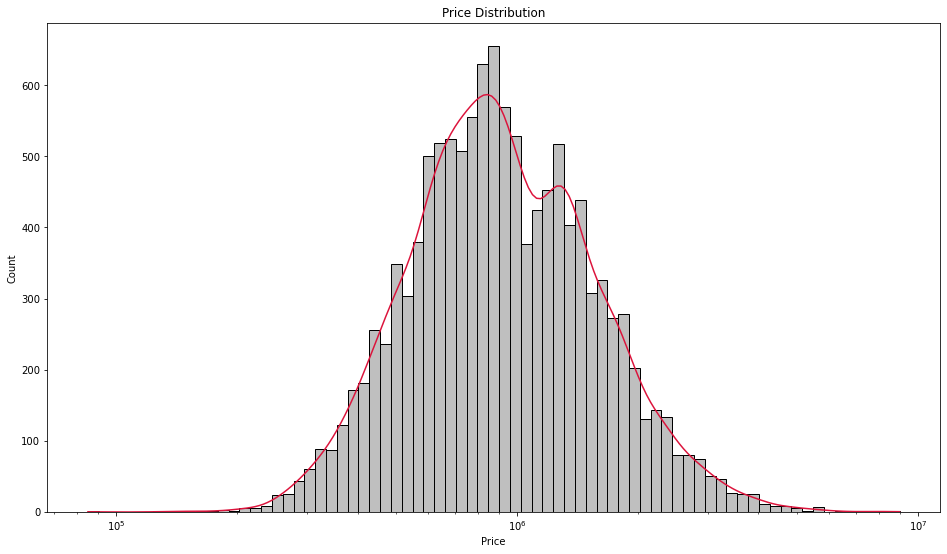

In [20]:
#Plotting data
fig  = plt.figure(figsize=(16, 9))
plot = sns.histplot(data= data, x= "Price", kde= True, log_scale=True, color= "grey")
plot.lines[0].set_color("crimson")


#labels
plt.title("Price Distribution")

plt.show()

Distribution of prices shows a peak in centre showing a saturation of similar prices which indicates it would have more datapoints. This area should have a higher prediction accuracy than the head or tail of the curve. There is another peak to the right which suggest another common price.

## Machine Learning Applications

### Encoding Categorical Data

In [21]:
objects = (data.dtypes == "object")
object_column_names = list(objects[objects].index)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for names in object_column_names:
    data[names] = data[[names]].apply(label_encoder.fit_transform)

cat_columns = ['Suburb', 'Address', 'Type', 'CouncilArea', 'Regionname']
data[cat_columns].head()

,Suburb,Address,Type,CouncilArea,Regionname
0,0,11527,0,31,2
1,0,5374,0,31,2
2,0,8847,0,31,2
3,0,8114,0,31,2
4,0,9554,0,31,2


As shown above, the columns with an object datatype are now set in numeric forms which can be used in machine learning algorithms.

As there are plenty of attributes that relate to the price of a house, I will be using multiple machine learning methods to explore various ways to predict the price. Depending on the results of each method, I will determine the best model that could potentially be carried through into deployment based on performance and accuracy measures. 

<AxesSubplot:>

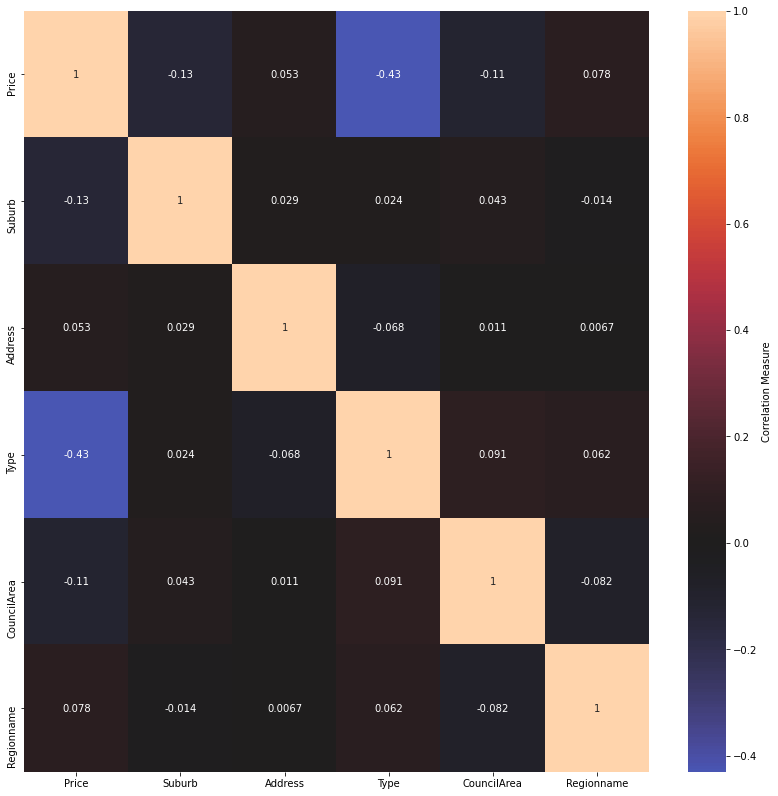

In [22]:
cat_columns = ['Price'] + cat_columns
cat_matrix = data[cat_columns].corr()
plt.figure(figsize=(14, 14))
sns.heatmap(cat_matrix, annot=True, center=0, cbar_kws={'label' : 'Correlation Measure'})

The encoded categories do not appear to show a positive correlation towards indicating the price. The CouncilArea and Regionname might be useful so will still be considered in training the models.

### Scaling features

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_keys = ["Rooms", "Type", "Bedroom2", "Bathroom", "Car", "CouncilArea", "Regionname"]
data_copy = data[data_keys].copy()
scaler.fit(data_copy)
scaled_df = pd.DataFrame(scaler.transform(data_copy), columns=data_copy.columns)
scaled_df.head()

,Rooms,Type,Bedroom2,Bathroom,Car,CouncilArea,Regionname
0,-0.932130,-0.667909,-0.895794,-0.751061,-0.603867,1.650575,-0.89852
1,-0.932130,-0.667909,-0.895794,-0.751061,-1.655768,1.650575,-0.89852
2,0.110295,-0.667909,0.135754,0.700539,-1.655768,1.650575,-0.89852
3,0.110295,-0.667909,0.135754,0.700539,-0.603867,1.650575,-0.89852
4,1.152720,-0.667909,0.135754,-0.751061,0.448033,1.650575,-0.89852


All used features have now been scaled relative to each other.

## Clustering

### Dimensionality Reduction

In the dataset, there are many attributes that may have correlating trends amongst themselves. Reducing the number of dimensions will ensure that the most relevant and performant data will be used.

Sklearns Principal component analysis (PCA) will combine similar attributes together into the specified number of dimensions.

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(scaled_df)
dimensionalised_df = pd.DataFrame(pca.transform(scaled_df), columns=(["column1", "column2", "column3"]))
dimensionalised_df.head()

,column1,column2,column3
0,-1.444638,1.783898,-0.333820
1,-1.796544,1.977324,-0.465872
2,-0.108939,2.085588,-1.016278
3,0.242966,1.892162,-0.884226
4,0.566200,1.823779,-0.440922


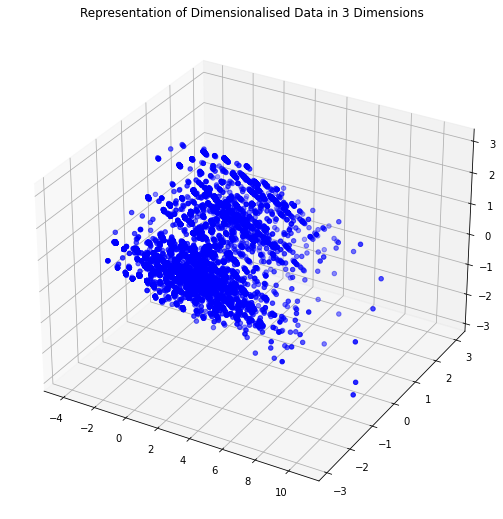

In [25]:
from mpl_toolkits.mplot3d import Axes3D

x = dimensionalised_df["column1"]
y = dimensionalised_df["column2"]
z = dimensionalised_df["column3"]

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="blue", marker = "o")
ax.set_title("Representation of Dimensionalised Data in 3 Dimensions")
plt.show()

The 3D representation does appear to show some visible clusters which will need to be indentified.

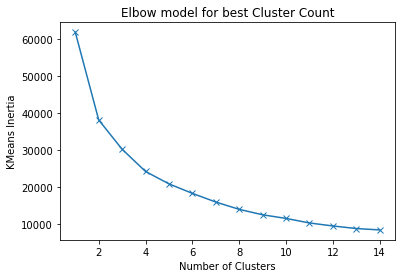

In [26]:
from sklearn.cluster import KMeans

cluster_range = range(1, 15)
inertia = []
for n in cluster_range:
    kms = KMeans(n_clusters=n)
    kms.fit(dimensionalised_df)
    inertia.append(kms.inertia_)

plt.plot(cluster_range, inertia, marker = 'x')
plt.xlabel("Number of Clusters")
plt.ylabel("KMeans Inertia")
plt.title("Elbow model for best Cluster Count")
plt.show()

In the graph above, an 'elbow' point is required which would suggest the best point for the number of clusters. It is fairly hard to judge where the elbow point is in this case as there are many clusters and appears to approach an asymptote gradually rather than suddenly which would point to the number of clusters. Concluding the clustering, this model does not appear to yield a useful outcome for predicting values. If the total target values were reduced then it could be a viable model.

## Price Classification & Regression

For predicting the price, the chosen machine learning model would need to have target values for it to be able to predict from the given input samples. There are 2 options that could be considered for the target values. Either the prices could be kept as is resulting in many class labels, or the prices can be grouped in small ranges, reducing the the overall number of class labels. If the project was to create an accurate house value predictor, then many class labels should be considered on a subjective 10 - 30k price interval.

### Linear Regression

In [35]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


target = data["Price"]
predictors = ["Rooms", "Type", "Bedroom2", "Bathroom", "Car", "CouncilArea", "Regionname"]
samples = data[predictors]

scaler = StandardScaler()
scaler.fit(samples)
scaled_samples_df = pd.DataFrame(scaler.transform(samples), columns=samples.columns)

#X_train, X_test, y_train, y_test = train_test_split(samples, target, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(scaled_samples_df, target, test_size=0.2, random_state=42)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [36]:
lin_reg_pred = reg.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % (mean_squared_error(y_test, lin_reg_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, lin_reg_pred))

Mean squared error: 284229238319.30
Coefficient of determination: 0.36


A perfect mean squared error result would be as close to 0.0 as possilbe and a perfect prediction score for the coefficient of determination would be better closer to 1.0. However, the scores from the linear regression model are very poor.

### Decision Trees

In [37]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

dtree_regressor = DecisionTreeRegressor()
dtree_regressor.fit(X_train, y_train)
dtree_reg_pred = dtree_regressor.predict(X_test)
print("Mean squared error: %.2f" % (mean_squared_error(y_test, dtree_reg_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, dtree_reg_pred))

Mean squared error: 197000901186.72
Coefficient of determination: 0.56


In [38]:
dtree_cls = DecisionTreeClassifier()
dtree_cls.fit(X_train, y_train)
dtree_cls_pred = dtree_cls.predict(X_test)
print("Mean squared error: %.2f" % (mean_squared_error(y_test, dtree_cls_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, dtree_cls_pred))

Mean squared error: 268228118345.81
Coefficient of determination: 0.40


### Support Vector Machines

In [39]:
from sklearn import svm
svm_reg_model = svm.SVR()
svm_reg_model.fit(X_train, y_train)
svm_c_pred = svm_reg_model.predict(X_test)
print("Mean squared error: %.2f" % (mean_squared_error(y_test, svm_c_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, svm_c_pred))

Mean squared error: 481747753883.35
Coefficient of determination: -0.08


### Random Forests

In [40]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
rdmfst_reg = RandomForestRegressor()
rdmfst_reg.fit(X_train, y_train)
rdmfst_reg_pred = rdmfst_reg.predict(X_test)
print("Mean squared error: %.2f" % (mean_squared_error(y_test, rdmfst_reg_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, rdmfst_reg_pred))

Mean squared error: 168617575657.37
Coefficient of determination: 0.62


In [43]:
rdmfst_classifier = RandomForestClassifier()
rdmfst_classifier.fit(X_train, y_train)
rdmfst_classifier_pred = rdmfst_classifier.predict(X_test)
print("Mean squared error: %.2f" % (mean_squared_error(y_test, rdmfst_classifier_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, rdmfst_classifier_pred))

Mean squared error: 245653666853.92
Coefficient of determination: 0.45


### Stochastic Gradient Decent

In [42]:
from sklearn.linear_model import SGDRegressor

sgdc_reg = SGDRegressor()
sgdc_reg.fit(X_train, y_train)
sgdc_reg_pred = sgdc_reg.predict(X_test)
print("Mean squared error: %.2f" % (mean_squared_error(y_test, sgdc_reg_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, sgdc_reg_pred))

Mean squared error: 283999943539.77
Coefficient of determination: 0.36


### Results

Coefficients of Determination:

**Linear Regression:** 0.36

**Decision Tree Regressor:** 0.56

**Decision Tree Classifier:** 0.40

**Support Vector Machine:** -0.08

**Random Forest Regressor:** 0.62

**Random Forest Classifier:** 0.45

**Stochastic Gradient Decent:** 0.36


For all tests on these models, the same test and train sets were used which ensures that the end result could have be compared. The data was scaled uniformly beforehand so that they would all have equal importance in training. From this information, it can be seen that regressors are more accurate than classifiers for this dataset. Although their prediction accuracy is still fairly low, they highlight which types of model could be looked at more in depth. The best performing model was the Random Forest Regressor and should be used if development were to be taken further.